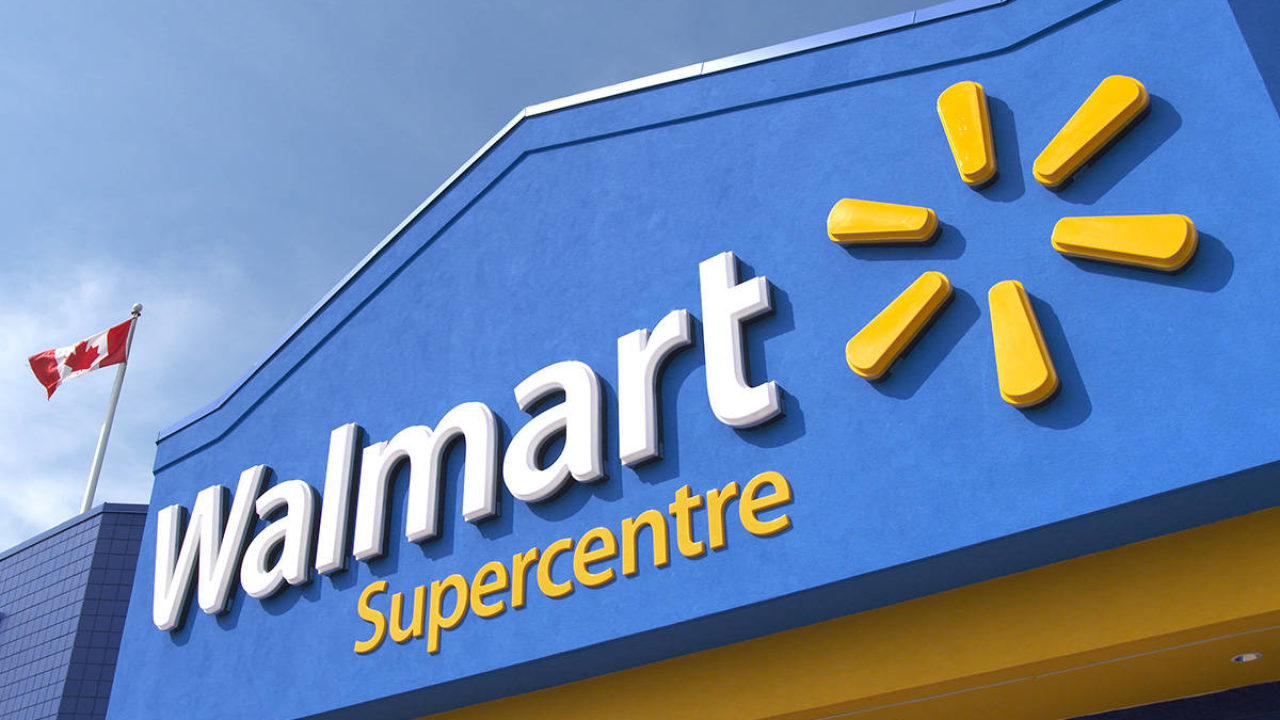

In [225]:
from IPython import display
display.Image('https://raw.githubusercontent.com/Masterx-AI/Project_Retail_Analysis_with_Walmart/main/Wallmart1.jpg')

# 💡Project Description:

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available..

# 👉 Dataset Info: 
This is the historical data that covers sales from 2010-02-05 to 2012-11-01,
in the file Walmart_Store_sales. Within this file you will find the following fields:\

1.Store - the store number

2.Date - the week of sales

3.Weekly_Sales - sales for the given store

4.Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

5.Temperature - Temperature on the day of sale

6.Fuel_Price - Cost of fuel in the region

7.CPI – Prevailing consumer price index

8.Unemployment - Prevailing unemployment rate

Holiday Events\ Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\ Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\ Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\ Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [226]:
# Import all necessary python packages

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [227]:
#Importing the dataset
df = pd.read_csv('Walmart (1).csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# 1. Inspecting the Dataset 

In [228]:
# Inspect dataset structure to understand the basic charactersistics of the dataset
# Also, it will help to identify potential datatype coversion needed for further analysis
print('Dataset structure:')

#Checking the dtypes of all the columns
print(df.info())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [229]:
# in total 45 stores are there. 
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [230]:
store_numbers=list(df['Store'].unique())

In [231]:
len(store_numbers)

45

In [232]:
# Check data types for performing data transformations and analysis later
print('\nData types:')
print(df.dtypes)


Data types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [233]:
# Summarize numerical columns - Checking the stats of all the columns
print('\nSummary statistics:')
print(df.describe())


Summary statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.23

In [234]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [235]:
# Check for missing values
print('\nMissing values:')
print(df.isnull().sum())


Missing values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


There are no missing values in any of the columns.
i.e. we have complete data for all the features, which is essential for conducting meaningful analyses and modeling.

# 2.Exploratory Data Analysis (EDA)

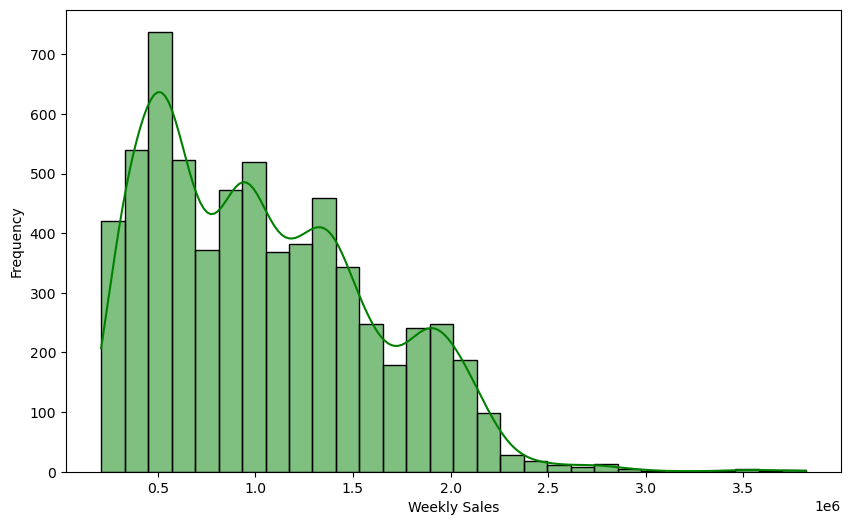

In [236]:
# a. Distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True, color='green')
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

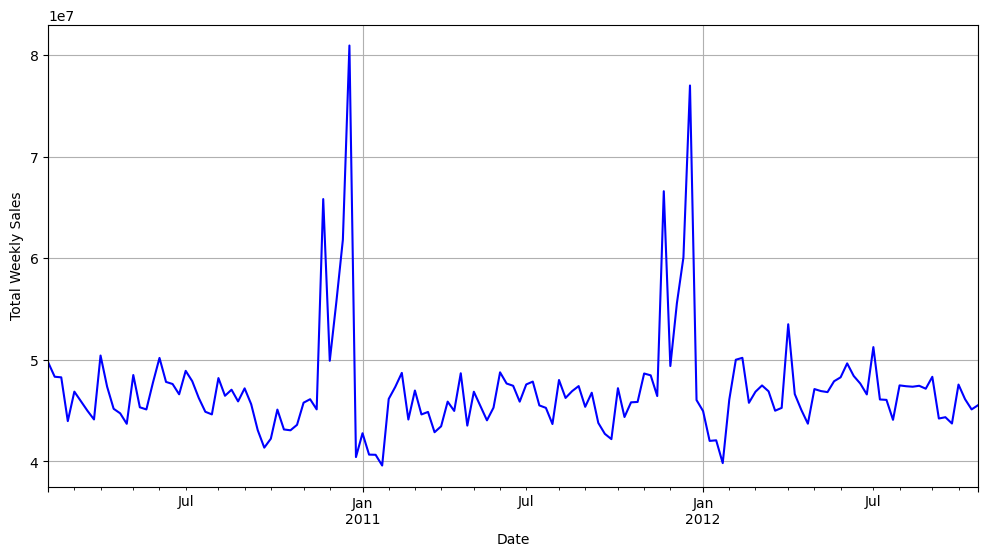

In [237]:
# b. Time-Series Analysis of Sales
plt.figure(figsize=(12, 6))
sales_trend = df.groupby('Date')['Weekly_Sales'].sum()
sales_trend.plot(color='blue')
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid()
plt.show()

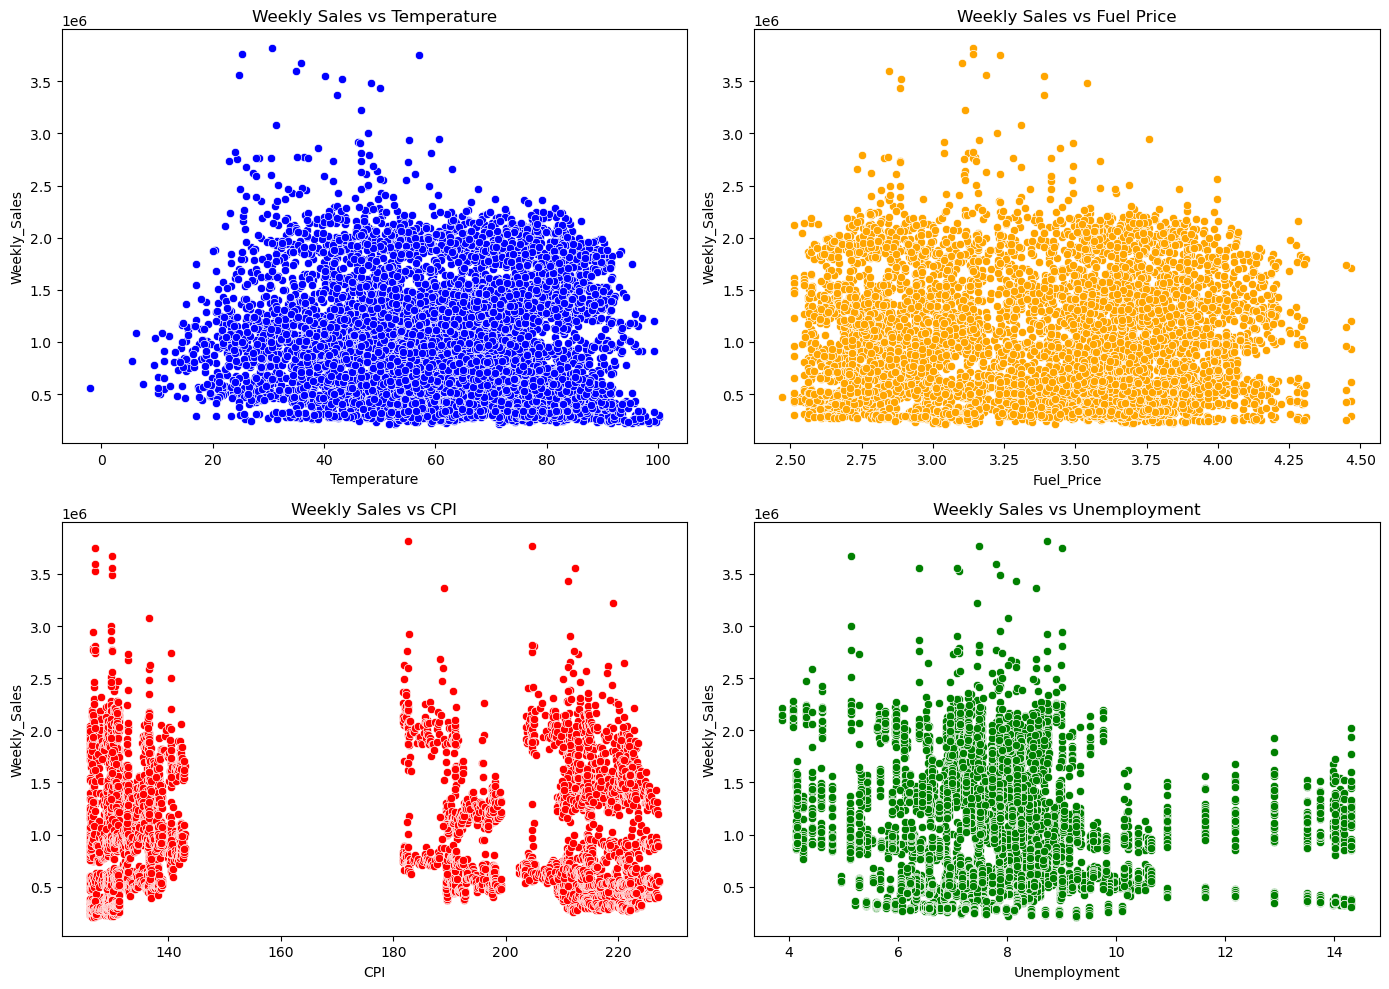

In [238]:
# c. Relationship with Temperature, Fuel_Price, CPI, and Unemployment
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Weekly Sales vs Temperature")
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', ax=axes[0, 1], color='orange')
axes[0, 1].set_title("Weekly Sales vs Fuel Price")
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', ax=axes[1, 0], color='red')
axes[1, 0].set_title("Weekly Sales vs CPI")
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', ax=axes[1, 1], color='green')
axes[1, 1].set_title("Weekly Sales vs Unemployment")
plt.tight_layout()
plt.show()

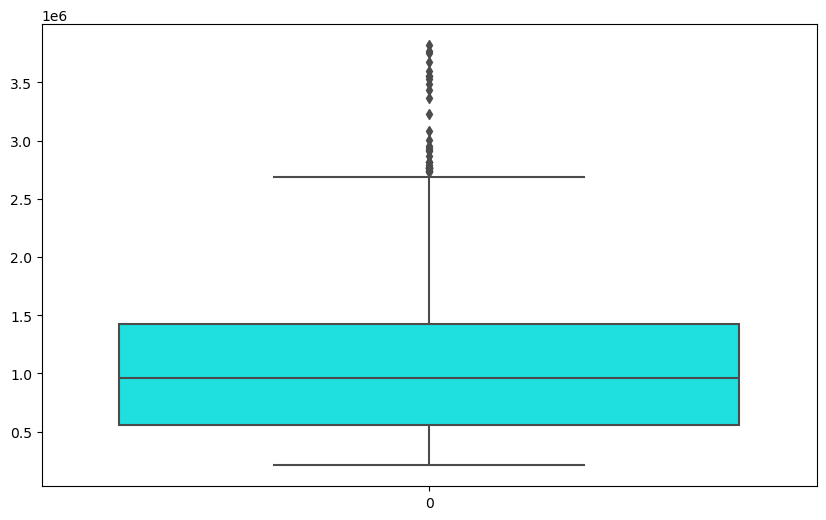

In [239]:
# 3. Outlier Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Weekly_Sales'], color='cyan')
plt.show()

# 3. problem solving

# 1. Part a --> If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [240]:
# in total 45 stores are there. 
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [241]:
len(store_numbers)

45

In [242]:
store_numbers=list(df['Store'].unique())

In [243]:
# we are seperating the data in stores. Different store data is created. 
# we run a loop to make every store data by its name.

for i in range(1,len(store_numbers)+1):
    globals()[f'Store{i}']= df[df['Store']==i]

In [244]:
Store20

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,2010-02-05,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,2010-02-12,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187
2721,20,2010-03-05,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,58.65,3.997,215.736716,7.280
2856,20,2012-10-05,2246411.89,0,60.77,3.985,215.925886,7.293
2857,20,2012-10-12,2162951.36,0,47.20,4.000,216.115057,7.293
2858,20,2012-10-19,1999363.49,0,56.26,3.969,216.146470,7.293


Let just pick those who have less Weekly Sales. As it will be too lenghty to analyze 45 stores.

We will pick those stores for which weekly sales is less than 10 percentile.

In [245]:
b1 = round(df['Weekly_Sales'].quantile(0.1),2)

In [246]:
less_sales=df[df['Weekly_Sales']<b1]['Store'].unique()
less_sales

array([ 3,  5,  7, 16, 30, 33, 36, 38, 44], dtype=int64)

Lets check if low value of sales is anyhow affected by unemployment rate.

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

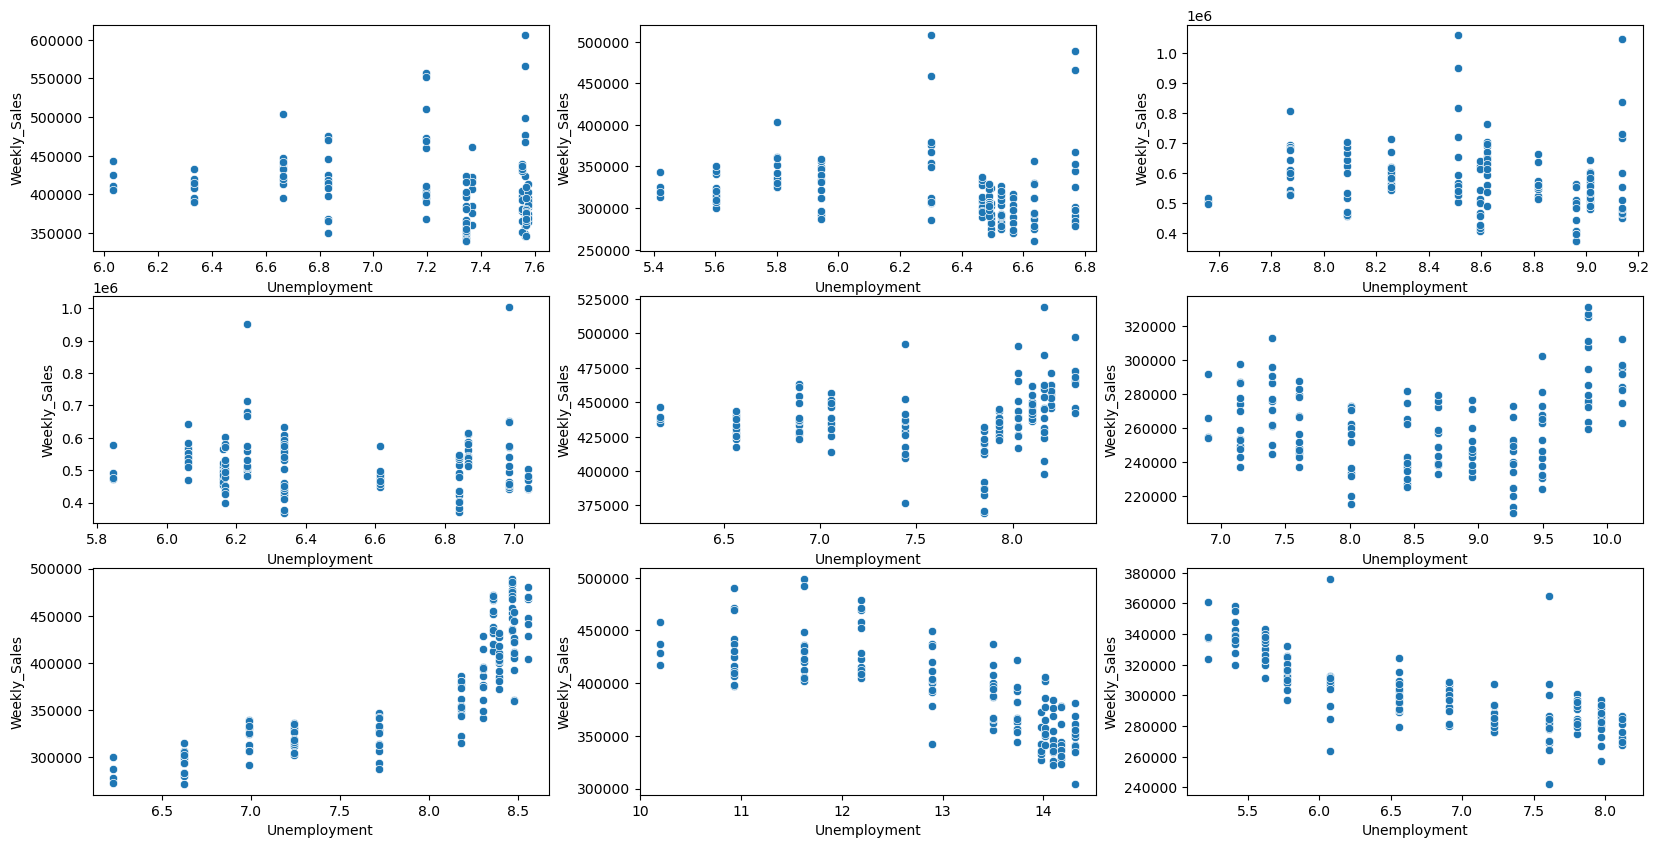

In [247]:
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
sns.scatterplot(data=Store3,x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,2)
sns.scatterplot(data=Store5,x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,3)
sns.scatterplot(data=Store7,x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,4)
sns.scatterplot(data=Store16,x='Unemployment',y='Weekly_Sales')

plt.subplot(3,3,5)
sns.scatterplot(data=Store30,x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,6)
sns.scatterplot(data=Store33,x='Unemployment',y='Weekly_Sales')
plt.title='Store33'

plt.subplot(3,3,7)
sns.scatterplot(data=Store36,x='Unemployment',y='Weekly_Sales')


plt.subplot(3,3,8)
sns.scatterplot(data=Store38,x='Unemployment',y='Weekly_Sales')

plt.subplot(3,3,9)
sns.scatterplot(data=Store44,x='Unemployment',y='Weekly_Sales')

Clearly we can see that in Store number 5 although average of weekly sales is not impacted by unemployement rate, but more density is higher on the higher side of unemployment rate.

There are two Stores we can identify in which weekly sales reduces as the unemployment rate increases. Those stores are Store number 38 and 44

# Part b --> If the weekly sales show a seasonal trend, when and what could be the reason?

In [248]:
df['Date']=pd.to_datetime(df['Date'],format='mixed')

In [249]:
sales_date = df[['Date','Weekly_Sales']]
sales_date.set_index('Date',inplace=True)
sales_date.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


<Axes: xlabel='Date'>

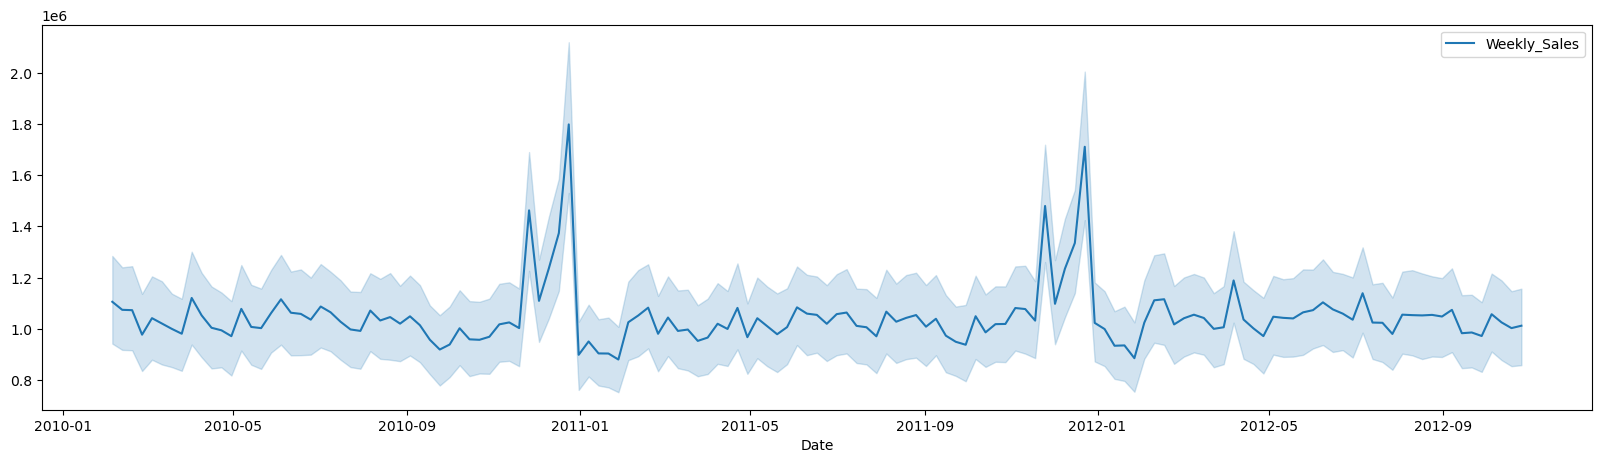

In [250]:
plt.figure(figsize=(20,5))
sns.lineplot(data=sales_date,palette='tab20')

Lets check the sales by holiday season.

<Axes: xlabel='Date', ylabel='Holiday_Flag'>

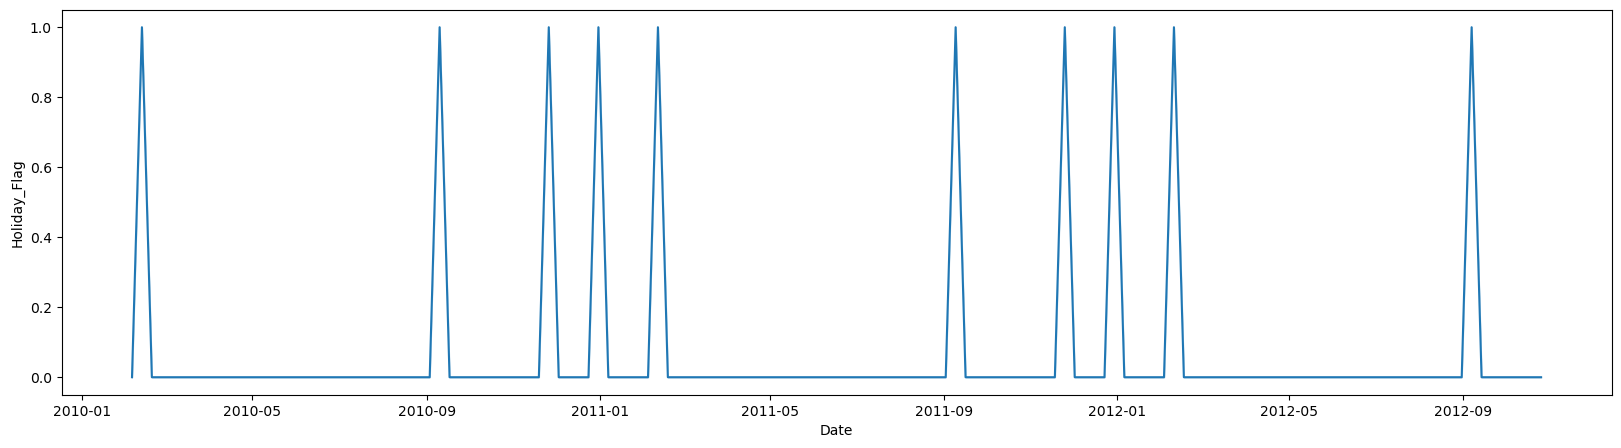

In [251]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x='Date',y='Holiday_Flag')

We can clearly see there is a seasonality component in weekly sales. Whole year sales is average. But at the end of the year there is an exponential hike in the sales.

The Major Reason is during this time of the year, the holiday season begins.

So, the spike in the sales overlaps with the holiday season.

As we know Walmart is very famous in USA, and there is a holiday season during christmans and new year, there might be a lot of offers being given by brands in holiday season. This explains the sudden spike in the sales at the end of the year.

# Part c --> Does temperature affect the weekly sales in any manner?

<Axes: xlabel='Date'>

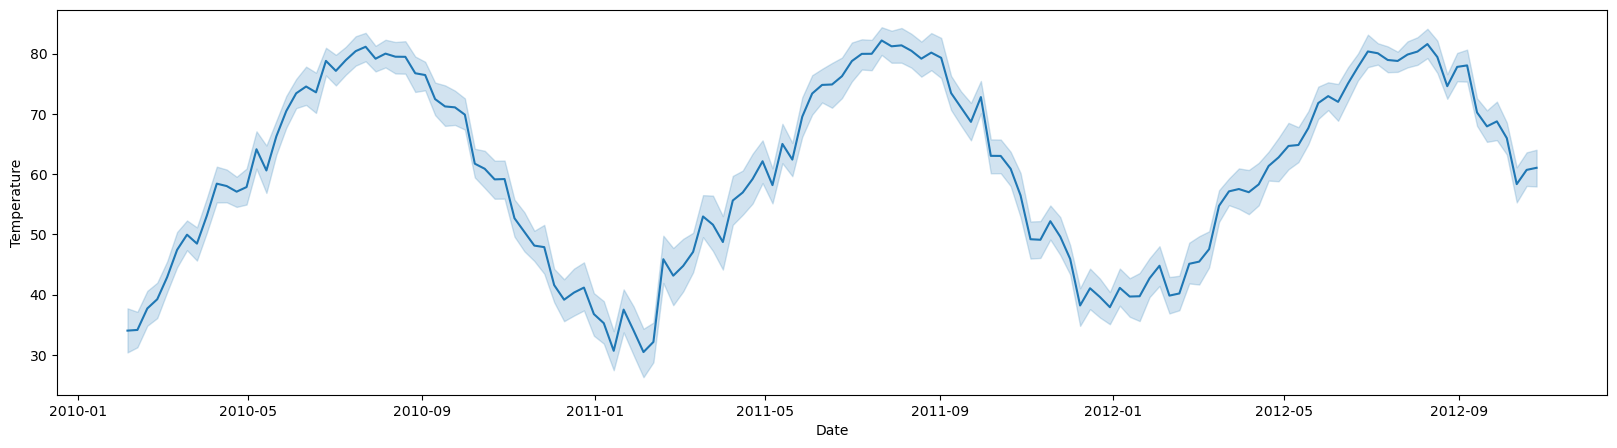

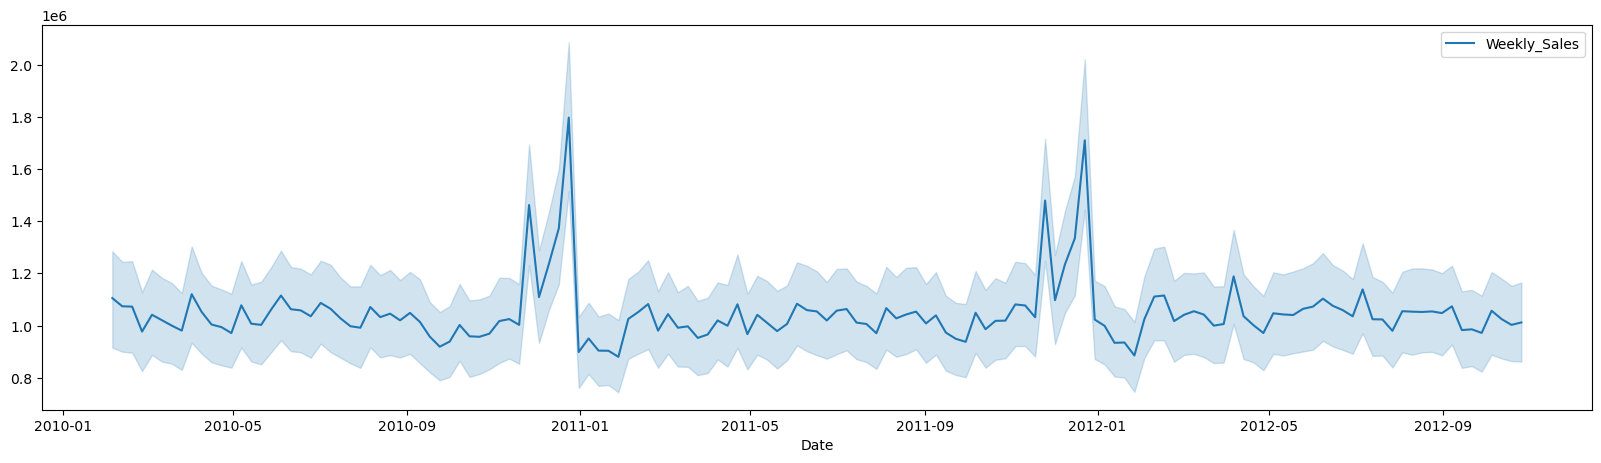

In [252]:
plt.figure(figsize=(20,5))
#sns.lineplot(data=df,x='Date',y='Weekly_Sales')
sns.lineplot(data=df,x='Date',y='Temperature')

plt.figure(figsize=(20,5))
sns.lineplot(data=sales_date,palette='tab20')

The only noted effect that can be seen is again of the holiday season. Holiday season are marked with winters and snow, that increases the needed clothing and stuff. Other than this there is no such clear trend of shopping related with temprature.

# Part d --> How is the Consumer Price index affecting the weekly sales of various stores?

In [253]:
df.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.9,0,42.31,2.572,211.096358,8.106


<Axes: xlabel='Date'>

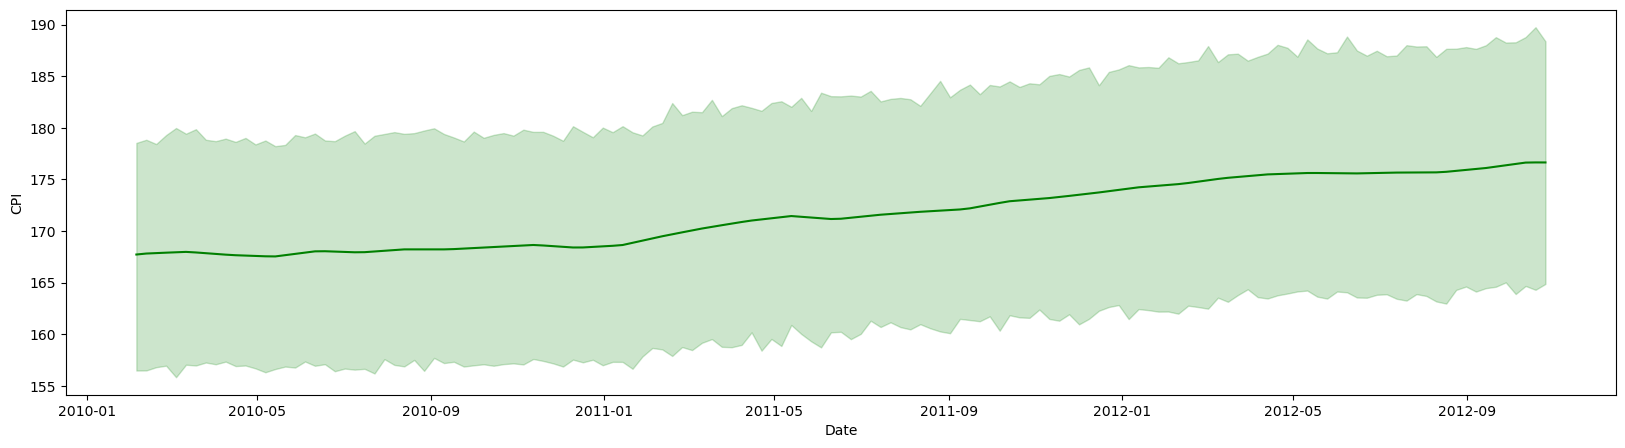

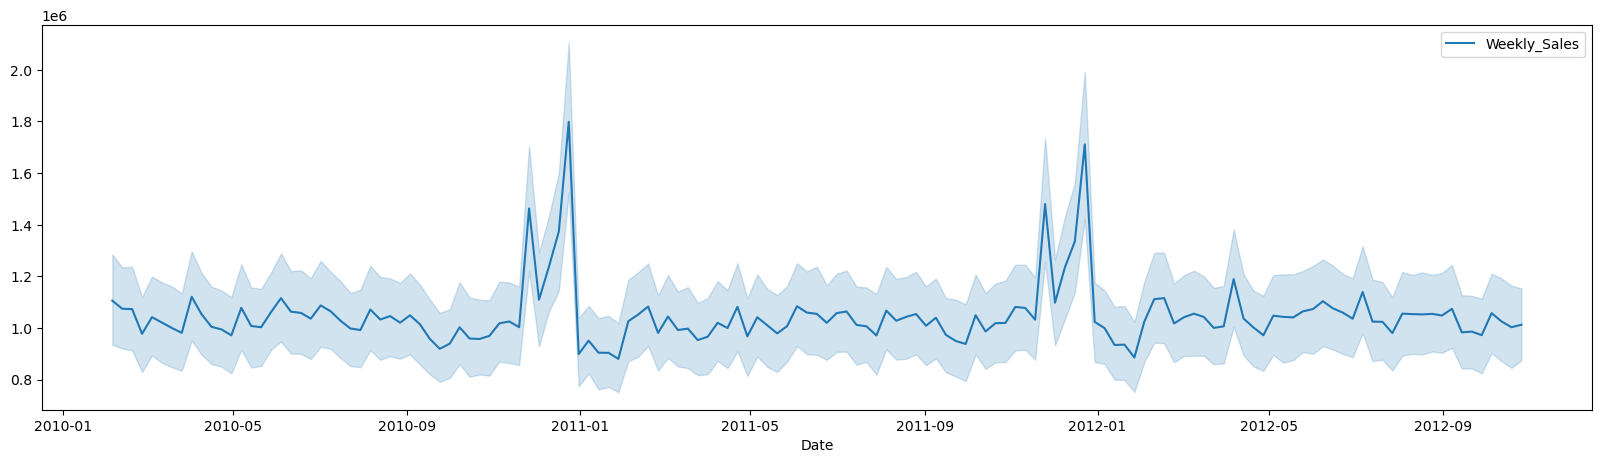

In [254]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x='Date',y='CPI',color='green')

plt.figure(figsize=(20,5))
sns.lineplot(data=sales_date)

Although there is inflation over time represented by increasing CPI over the time period. There is no upward or downward trend followed by weekly sales.

# Part e --> Top performing stores according to the historical data.

Lets check the store with maximum average sales over the given period.

In [255]:
df.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.9,0,42.31,2.572,211.096358,8.106


In [256]:
average_store_sales=df.groupby('Store')['Weekly_Sales'].agg('mean')

In [257]:
ave_sales=pd.DataFrame(average_store_sales)

In [258]:
ave_sales['Weekly_Sales']=ave_sales['Weekly_Sales']/(ave_sales['Weekly_Sales'].max()-ave_sales['Weekly_Sales'].min())

In [259]:
ave_sales

,Weekly_Sales
Store,
1,0.841677
2,1.042177
3,0.217935
4,1.133616
5,0.172102
6,0.846799
7,0.308806
8,0.491797
9,0.294391


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

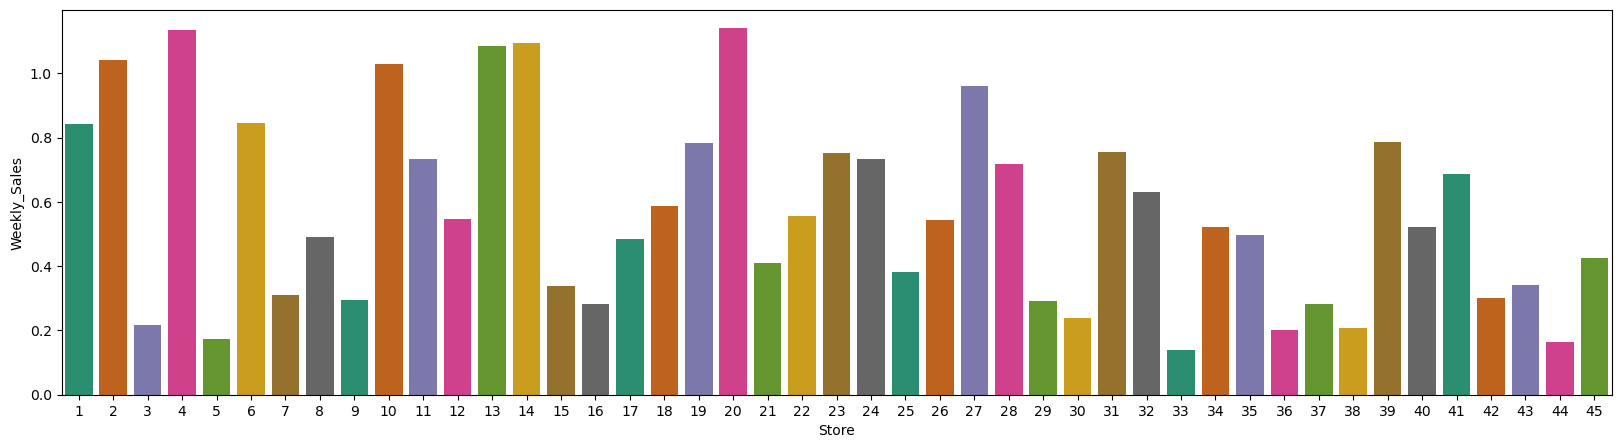

In [260]:
plt.figure(figsize=(20,5))
sns.barplot(data=ave_sales,x=ave_sales.index,y='Weekly_Sales',palette='Dark2')

In [261]:
ave_sales.sort_values('Weekly_Sales',ascending=False).head(5)

,Weekly_Sales
Store,
20,1.140632
4,1.133616
14,1.093712
13,1.084319
2,1.042177


Top performing 5 stores are --> store number 20, 4, 14, 13, 2

# Part f --> The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [262]:
ave_sales.sort_values('Weekly_Sales').head(5)

,Weekly_Sales
Store,
33,0.140632
44,0.163842
5,0.172102
36,0.202137
38,0.208750


Worst performing stores are 33, 44, 5, 36, 38.

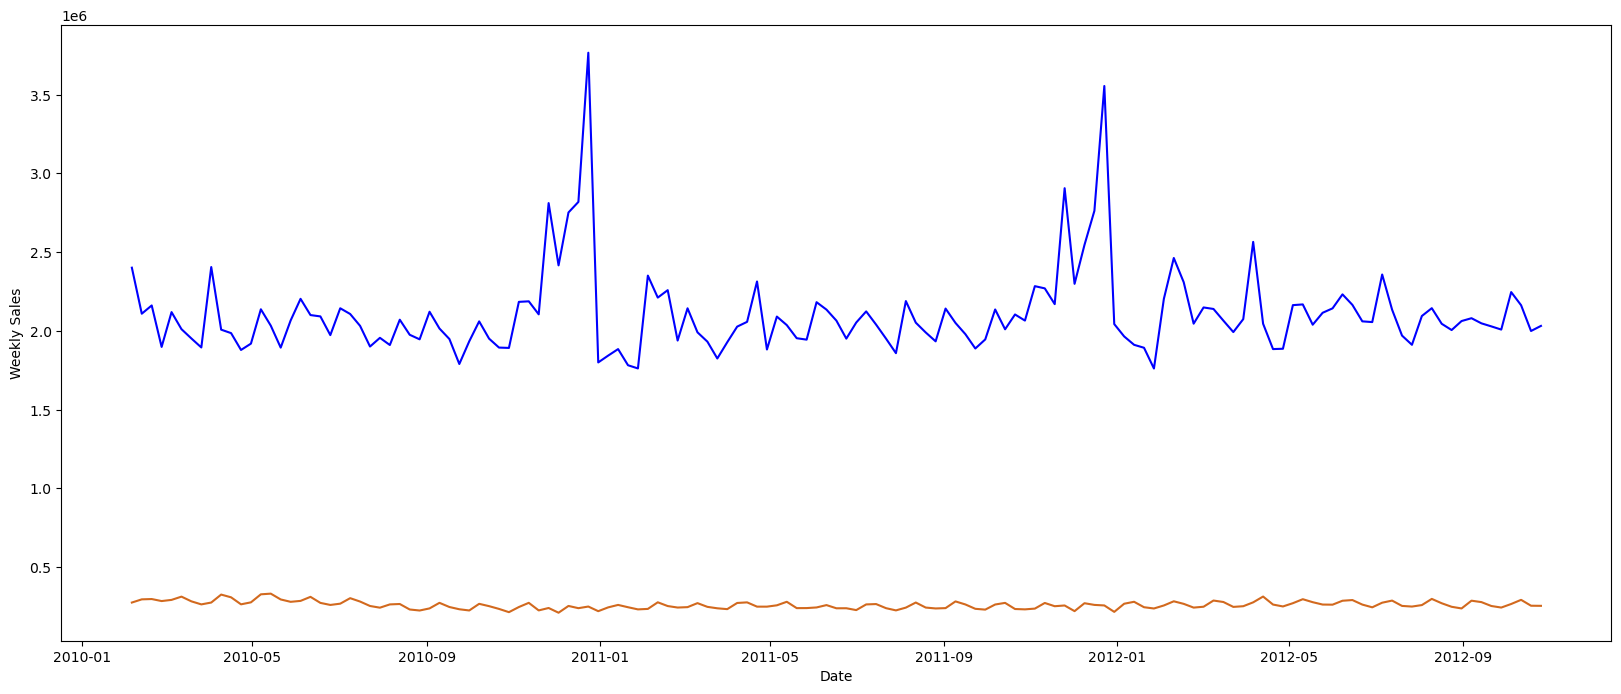

In [263]:
plt.figure(figsize=(20,8))
sns.lineplot(data=Store20,x='Date',y='Weekly_Sales',color = 'blue')
sns.lineplot(data=Store33,x='Date',y='Weekly_Sales',color = 'chocolate')
plt.ylabel('Weekly Sales')
plt.show()

Significant difference in highest and lowest performing store.

In [264]:
ave_sales_2=pd.DataFrame(average_store_sales)

In [265]:
(ave_sales_2.loc[33][0]/ave_sales_2.loc[20][0])*100

12.329294669579147

Lowest performing store's sales only accounts for 12% of sales done by top performing store on average.

# 2 --> Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [266]:
# Extract month and year from the Date column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Aggregate sales by month
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
monthly_sales

,Year,Month,Weekly_Sales
0,2010,2,1.903330e+08
1,2010,3,1.819198e+08
2,2010,4,2.314124e+08
3,2010,5,1.867109e+08
4,2010,6,1.922462e+08
5,2010,7,2.325801e+08
6,2010,8,1.876401e+08
7,2010,9,1.772679e+08
8,2010,10,2.171618e+08
9,2010,11,2.028534e+08


In [267]:
# Pivot to get a better view of year-over-year trends
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='Weekly_Sales')
monthly_sales_pivot

Year,2010,2011,2012
Month,,,
1,NaN,1.637040e+08,1.688945e+08
2,1.903330e+08,1.863313e+08,1.920636e+08
3,1.819198e+08,1.793564e+08,2.315097e+08
4,2.314124e+08,2.265265e+08,1.889209e+08
5,1.867109e+08,1.816482e+08,1.887665e+08
6,1.922462e+08,1.897734e+08,2.406103e+08
7,2.325801e+08,2.299114e+08,1.875095e+08
8,1.876401e+08,1.885993e+08,2.368508e+08
9,1.772679e+08,2.208477e+08,1.806455e+08


In [268]:
def forecast_sales(store_number, data = df, forecast_weeks=12):
    """
    Forecast weekly sales for the next `forecast_weeks` for a specific store using SARIMA.
    
    Parameters:
        store_number (int): The store number for which the forecast is to be made.
        data (pd.DataFrame): The dataset containing columns 'Store', 'Date', and 'Weekly_Sales'.
        forecast_weeks (int): Number of weeks to forecast. Default is 12.
        
    Returns:
        None: Displays the forecast plot and prints forecast values.
    """
    # Ensure the data is in the correct format
    data['Week'] = data['Date'].dt.to_period('W').apply(lambda x: x.start_time)
    weekly_sales = data.groupby(['Store', 'Week'])['Weekly_Sales'].sum().reset_index()
    
    # Filter data for the given store
    store_data = weekly_sales[weekly_sales['Store'] == store_number].set_index('Week')
    
    if store_data.empty:
        print(f"No data available for Store {store_number}.")
        return
    
    # Train-Test Split (optional: can exclude if no test validation is needed)
    train_data = store_data['Weekly_Sales']
    
    # Fit the SARIMA model
    print(f"Training SARIMA model for Store {store_number}...")
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    model_fit = model.fit(disp=False)
    
    # Forecast for the next 'forecast_weeks' weeks
    forecast = model_fit.get_forecast(steps=forecast_weeks)
    forecast_df = forecast.conf_int()
    forecast_df['Forecast'] = forecast.predicted_mean
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(store_data['Weekly_Sales'], label='Historical Sales', color='blue')
    plt.plot(forecast_df['Forecast'], label='Forecast', color='red', linestyle='--')
    plt.fill_between(
        forecast_df.index, 
        forecast_df.iloc[:, 0], 
        forecast_df.iloc[:, 1], 
        color='pink', alpha=0.3, label='Confidence Interval'
    )
    plt.xlabel('Week')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Print forecast values
    print(f"Forecast for the next {forecast_weeks} weeks for Store {store_number}:")
    print(forecast_df[['Forecast']])

Training SARIMA model for Store 14...


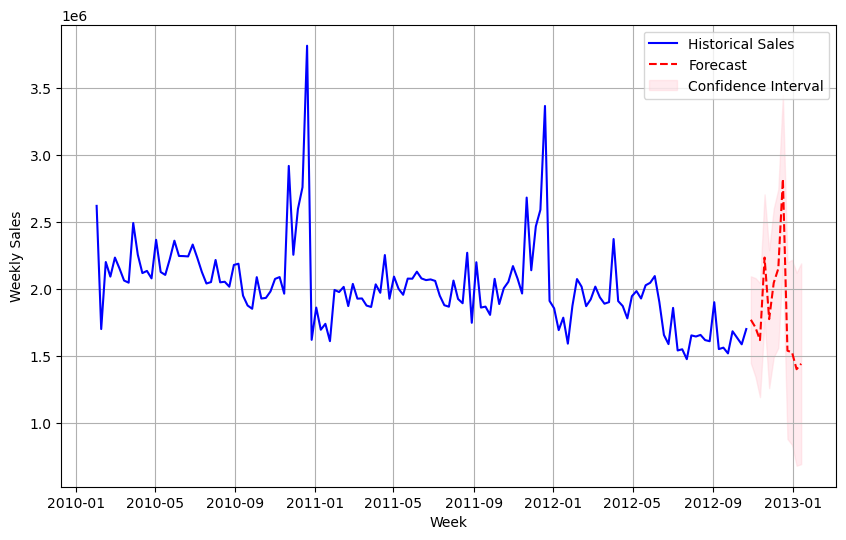

Forecast for the next 12 weeks for Store 14:
                Forecast
2012-10-29  1.773523e+06
2012-11-05  1.716684e+06
2012-11-12  1.621523e+06
2012-11-19  2.237781e+06
2012-11-26  1.778251e+06
2012-12-03  2.048783e+06
2012-12-10  2.154986e+06
2012-12-17  2.824027e+06
2012-12-24  1.542643e+06
2012-12-31  1.530524e+06
2013-01-07  1.404452e+06
2013-01-14  1.445121e+06


In [269]:
forecast_sales(14)

# Conclusion

Walmart has evolved from a small variety store founded by Sam Walton in 1962 into the largest retailer in the world, with a significant presence in both physical and digital marketplaces. This transformation has been driven by strategic initiatives aimed at enhancing operational efficiency, expanding product offerings, and embracing technological advancements.


Market Leadership and Expansion:

Walmart's aggressive expansion strategy, including the acquisition of companies like Jet.com and Flipkart, has allowed it to strengthen its e-commerce capabilities and penetrate emerging markets. The integration of advanced data analytics and supply chain innovations has positioned Walmart as a formidable competitor against giants like Amazon, enabling a 69% increase in e-commerce sales attributed to these enhancements23.


Sustainability Efforts:

In addition to its business growth, Walmart has made significant commitments to sustainability. Initiatives such as Project Gigaton aim to reduce greenhouse gas emissions and promote renewable energy usage across its operations. These efforts reflect Walmart's recognition of its environmental responsibilities and its goal to operate as a "good steward of the environment" while meeting consumer demands for sustainable practices

Social Impact and Challenges:

Despite its successes, Walmart faces criticism regarding its impact on local economies and labor practices. The company's market dominance often leads to the closure of smaller businesses unable to compete with its pricing strategies. Furthermore, past issues related to labor laws have raised questions about its corporate ethics5. As Walmart continues to grow, balancing profitability with social responsibility will be crucial for maintaining its reputation and customer loyalty.

In summary, Walmart's journey illustrates a complex interplay between innovation, market leadership, sustainability efforts, and social challenges. As it navigates the evolving retail landscape, the company's ability to adapt will determine its future success and impact on global commerce.

----------------------------------------------------------------------Thankyou--------------------------------------------------------------------------